In [25]:
import os
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np

### Loading data

In [12]:
def load_data(folder_path, label):
    texts = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):
            with open(os.path.join(folder_path, filename), 'r', encoding='utf-8') as file:
                texts.append((file.read(), label))
    return texts

positive_texts = load_data(r'E:\Computer SCIENCE MS - FAU\NLP\Assignment-3\sentiment analysis texts-1\txt_sentoken\pos', 'positive')
negative_texts = load_data(r'E:\Computer SCIENCE MS - FAU\NLP\Assignment-3\sentiment analysis texts-1\txt_sentoken\neg', 'negative')

# combining and create a DataFrame
all_texts = positive_texts + negative_texts
df = pd.DataFrame(all_texts, columns=['text', 'label'])

### Performing Sentiment Analysis - using TextBlob

In [13]:
def textblob_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    return 'positive' if polarity > 0 else 'negative'

df['textblob_sentiment'] = df['text'].apply(textblob_sentiment) # applying TextBlob sentiment analysis

### Performing Sentiment Analysis - using Vader

In [14]:
analyzer = SentimentIntensityAnalyzer() # initalizing vader analysis

def vader_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    return 'positive' if score > 0 else 'negative'

df['vader_sentiment'] = df['text'].apply(vader_sentiment) # applying vader sentiment analysis

### Displaying results

In [43]:
import random
display_limit = 25   #displying limited number of files instead of all 2000
df_sampled = df.sample(frac=1, random_state=42).reset_index(drop=True) #taking dataframe rows randomly 

# ANSI escape code for bold
bold_start = "\033[1m"
bold_end = "\033[0m"

for index, row in df_sampled.head(display_limit).iterrows():   # results from the sentiment analysis
    print(f"Text {index + 1}:")
    print(f"{bold_start}Content:{bold_end} {row['text'][:200]}...")  # display only the first 200 characters, if the text is very long, for readability
    print(f"{bold_start}Actual Label:{bold_end} {row['label']}")
    print(f"{bold_start}TextBlob Sentiment Result:{bold_end} {row['textblob_sentiment']}")
    print(f"{bold_start}Vader Sentiment Result:{bold_end} {row['vader_sentiment']}")
    print("-" * 50)  # separator

Text 1:
Content: i guess that if a very wild bachelor party had gone really bad , there would be broken furniture , traces of smack and cocaine on the floor , and a dead prostitute in the bathroom . 
i guess that if a...
Actual Label: negative
TextBlob Sentiment Result: negative
Vader Sentiment Result: negative
--------------------------------------------------
Text 2:
Content: with the abundance of trite , recycled movies in the late '90s , there is a tremendous demand by movie lovers ( never mind movie critics ) for movies that present the wide film audience with something...
Actual Label: positive
TextBlob Sentiment Result: positive
Vader Sentiment Result: positive
--------------------------------------------------
Text 3:
Content: as a hot-shot defense attorney , kevin lomax ( keanu reeves ) has a special talent for picking juries that will ultimately acquit his clients . 
he is also an excellent judge of character , knowing ju...
Actual Label: negative
TextBlob Sentiment Result: p

## Comparing perfomance of both the analysis from Textblob and Vader

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

textblob_accuracy = accuracy_score(df['label'], df['textblob_sentiment']) # calculating accuracy
vader_accuracy = accuracy_score(df['label'], df['vader_sentiment'])

print("TextBlob Accuracy:", textblob_accuracy)
print("Vader Accuracy:", vader_accuracy)

print("TextBlob Classification Report:") # classification report
print(classification_report(df['label'], df['textblob_sentiment'], zero_division=1))

print("Vader Classification Report:") # classification report
print(classification_report(df['label'], df['vader_sentiment'], zero_division=1))

TextBlob Accuracy: 0.6
Vader Accuracy: 0.639
TextBlob Classification Report:
              precision    recall  f1-score   support

    negative       0.89      0.23      0.36      1000
    positive       0.56      0.97      0.71      1000

    accuracy                           0.60      2000
   macro avg       0.72      0.60      0.54      2000
weighted avg       0.72      0.60      0.54      2000

Vader Classification Report:
              precision    recall  f1-score   support

    negative       0.73      0.43      0.55      1000
    positive       0.60      0.84      0.70      1000

    accuracy                           0.64      2000
   macro avg       0.67      0.64      0.62      2000
weighted avg       0.67      0.64      0.62      2000



### Displaying classification metrics with a Bar Chart for better evaluating comparision

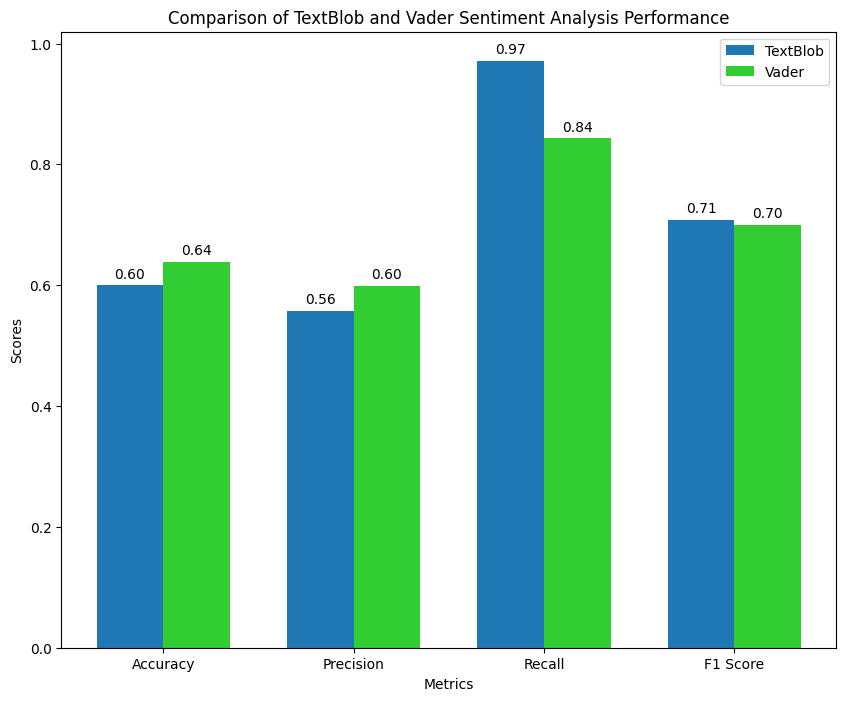

In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score

metrics = {
    "Accuracy": [accuracy_score(df['label'], df['textblob_sentiment']), accuracy_score(df['label'], df['vader_sentiment'])],
    "Precision": [precision_score(df['label'], df['textblob_sentiment'], pos_label='positive'), 
                  precision_score(df['label'], df['vader_sentiment'], pos_label='positive')],
    "Recall": [recall_score(df['label'], df['textblob_sentiment'], pos_label='positive'), 
               recall_score(df['label'], df['vader_sentiment'], pos_label='positive')],
    "F1 Score": [f1_score(df['label'], df['textblob_sentiment'], pos_label='positive'), 
                 f1_score(df['label'], df['vader_sentiment'], pos_label='positive')]
}

labels = list(metrics.keys())
textblob_scores = [metrics[metric][0] for metric in labels]
vader_scores = [metrics[metric][1] for metric in labels]

x = np.arange(len(labels))  
width = 0.35  

fig, ax = plt.subplots(figsize=(10, 8))
bars1 = ax.bar(x - width/2, textblob_scores, width, label='TextBlob')
bars2 = ax.bar(x + width/2, vader_scores, width, label='Vader', color='limegreen')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of TextBlob and Vader Sentiment Analysis Performance')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

plt.show()

### Confusion Matrix

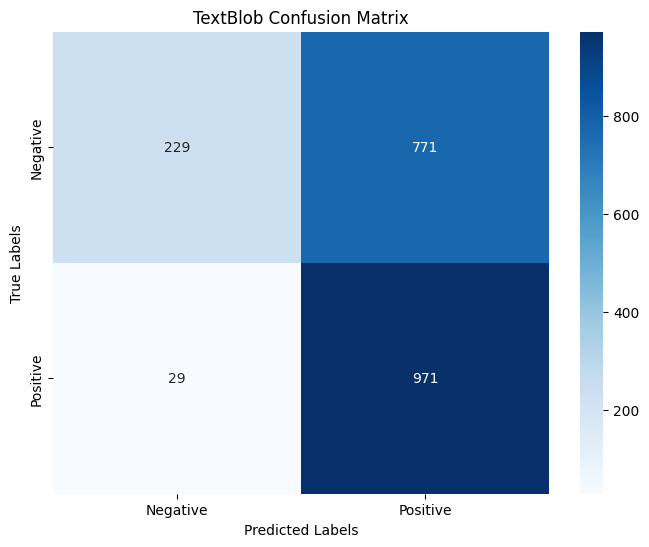

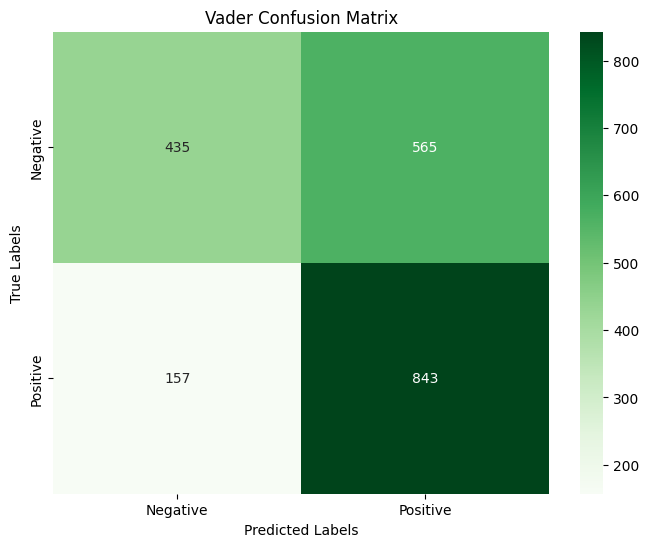

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# creating confusion matrices
textblob_cm = confusion_matrix(df['label'], df['textblob_sentiment'])  # for textblob
vader_cm = confusion_matrix(df['label'], df['vader_sentiment']) # for vader

plt.figure(figsize=(8, 6)) #plot for textBlob confusion matrix
sns.heatmap(textblob_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('TextBlob Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

plt.figure(figsize=(8, 6)) # plot vader confusion matrix
sns.heatmap(vader_cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Vader Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Based on the confusion matrices for TextBlob and Vader, we can draw a few conclusions regarding the performance of each sentiment analysis tool.

#### TextBlob Confusion Matrix
- True Negatives (TN): 229 - These are correctly classified negative texts.
- False Positives (FP): 771 - Negative texts incorrectly classified as positive.
- False Negatives (FN): 29 - Positive texts incorrectly classified as negative.
- True Positives (TP): 971 - Correctly classified positive texts.

#### Vader Confusion Matrix
- True Negatives (TN): 435 - Correctly classified negative texts.
- False Positives (FP): 565 - Negative texts incorrectly classified as positive.
- False Negatives (FN): 157 - Positive texts incorrectly classified as negative.
- True Positives (TP): 843 - Correctly classified positive texts.

### Summary and Comparison
#### 1) TextBlob Performance:

- TextBlob is biased towards predicting positive sentiment, as indicated by a high number of false positives (771).
- Despite this bias, it has a relatively high true positive count (971), meaning it successfully identifies positive texts in most cases.
- However, TextBlob struggles significantly with accurately identifying negative texts, resulting in poor performance for negative sentiment detection.

#### 2) Vader Performance:

- Vader performs better in detecting negative sentiment compared to TextBlob, with 435 true negatives versus TextBlob’s 229.
- It also has a lower false positive rate (565) than TextBlob, indicating it is more balanced in distinguishing positive and negative texts.
- However, Vader has a higher false negative count (157) than TextBlob, meaning it sometimes misses positive sentiments.
- Overall, Vader’s performance is more balanced but slightly less accurate in detecting positive sentiment compared to TextBlob.

## Conclusions
#### Overall Bias: TextBlob shows a clear bias toward predicting positive sentiment, while Vader has a more balanced approach between positive and negative sentiments.
#### Best Use Cases:
##### - TextBlob may be better suited for datasets or applications where positive sentiment detection is more important, but its over-prediction of positive sentiment may reduce reliability for detecting negative sentiment.
##### - Vader could be a better choice for more balanced sentiment detection, especially for tasks where accurately identifying both positive and negative sentiments is crucial.